In [85]:
import numpy as np
import matplotlib.pyplot as plt

In [86]:
class neural_net:
    
    def __init__(self,x,y,struct,activ,epoch,lr=0.01):
        self.layers=len(struct)
        self.struct=struct
        self.activ=activ
        self.x=x
        self.y=y
        self.param=self.evaluate(epoch,lr)

    def gen_network(self):
        param={}
        for i in range(self.layers):
            if i==0:a,b=self.struct[i],self.x.shape[0]
            else:a,b=self.struct[i],self.struct[i-1]
            param[f'w{i+1}']=np.random.randn(a,b)
            param[f'b{i+1}']=np.random.randn(a,1)
        return param

    def activate(self,z,func,d=False,alpha=0.01):
        if func=='s':
            if not d: return 1/(1+np.exp(-z))
            else:     return z*(1-z)
        elif func=='t':
            if not d: return (np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))
            else:     return 1-z**2
        elif func=='r':
            if not d: return np.maximum(0,z)
            else:     return np.int64(z>0)
        elif func=='lr':
            if not d: return np.maximum(0.01*z,z)
            else:     return np.where(z>0,1,alpha)
            
    def forward(self,param):
        fwd={}
        for i in range(self.layers):
            if i==0:
                fwd[f'z{i+1}']=np.dot(param['w1'],self.x)+param[f'b{i+1}']
                fwd[f'a{i+1}']=self.activate(z=(fwd[f'z{i+1}']),func=self.activ[i]) 
            else:
                fwd[f'z{i+1}']=np.dot(param[f'w{i+1}'],fwd[f'a{i}'])+param[f'b{i+1}']
                fwd[f'a{i+1}']=self.activate(z=fwd[f'z{i+1}'],func=self.activ[i]) 
        return fwd

    def back(self,fwd,param):
        delta={}
        for i in range(self.layers,0,-1):
            if i==self.layers:
                delta[f'dz{i}']=fwd[f'a{i}']-self.y
                delta[f'dw{i}']=np.dot(delta[f'dz{i}'],fwd[f'a{i-1}'].T)/self.y.shape[1]
                delta[f'db{i}']=np.sum(delta[f'dz{i}'],axis=1,keepdims=True)/self.y.shape[1]
            elif i==1:
                delta[f'dz{i}']=(np.dot(param[f'w{i+1}'].T,delta[f'dz{i+1}']))*(self.activate(fwd[f'z{i}'],self.activ[len(self.activ)-2],d=True))
                delta[f'dw{i}']=np.dot(delta[f'dz{i}'],self.x.T)/self.y.shape[1]
                delta[f'db{i}']=np.sum(delta[f'dz{i}'],axis=1,keepdims=True)/self.y.shape[1]
            else:
                delta[f'dz{i}']=(np.dot(param[f'w{i+1}'].T,delta[f'dz{i+1}']))*(self.activate(fwd[f'z{i}'],self.activ[len(self.activ)-i-1],d=True))
                delta[f'dw{i}']=np.dot(delta[f'dz{i}'],fwd[f'a{i-1}'].T)/self.y.shape[1]
                delta[f'db{i}']=np.sum(delta[f'dz{i}'],axis=1,keepdims=True)/self.y.shape[1]
        return delta

    def update(self,param,delta,lr):
        for i in param:
            param[i]-=lr*delta[f'd{i}']
        return param
    
    def cost(self,yh,n):
        m = self.y.shape[1]
        try:
            logp = np.multiply(self.y,np.log(yh))+np.multiply((1-self.y),np.log(1-yh))
            cost = np.sum(-logp)/m
        except Exception as e:
            print(n,e)
        cost=float(np.squeeze(cost))
        return cost
    
    def evaluate(self,epoch,lr,cost_out=True):  
        param=self.gen_network()
        cost=[]
        for i in range(epoch):
            fwd=self.forward(param=param)
            cost.append(self.cost(fwd[f'a{len(self.struct)}'],i))
            delta=self.back(fwd,param)
            param=self.update(param,delta,lr)
        if cost_out:
            plt.plot(cost)
            print(cost[0],cost[-1])
        return param

In [87]:
np.random.seed(1)
x = np.random.randn(4,10)
y = (np.random.randn(1,10)>0)

0.6453279553316505 0.005875362789199446


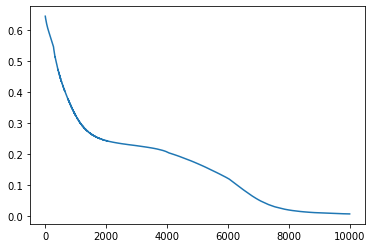

In [88]:
nn=neural_net(x,y,[4,3,2,1],['r','r','lr','s'],10000,0.01)

In [89]:
nn.param

{'w1': array([[ 0.15561773, -0.7621085 , -2.13417425,  0.04738346],
        [-1.74628501,  1.71027619, -0.17726542,  0.42012197],
        [ 0.46611449,  1.42772349, -0.61914103,  1.35970262],
        [ 0.51780658, -0.30146121,  0.48717496, -0.07387276]]),
 'b1': array([[ 0.98658615],
        [ 0.94535524],
        [ 1.98811192],
        [-1.39497524]]),
 'w2': array([[-1.44392116, -0.50436288,  0.1601149 ,  0.87616892],
        [ 1.41524573, -2.33302314, -0.58674695,  0.82797464],
        [-1.18478549,  1.41933898,  0.69382078, -0.20075807]]),
 'b2': array([[ 0.20886017],
        [ 0.38232761],
        [-0.57639622]]),
 'w3': array([[ 0.14958311, -0.82631313, -0.12439   ],
        [ 0.1216987 ,  2.12673132,  2.25242117]]),
 'b3': array([[ 1.97431179],
        [-1.12304009]]),
 'w4': array([[-2.09453351,  2.86115258]]),
 'b4': array([[-1.06011252]])}

In [90]:
nn.layers

4

In [91]:
for i in range(4,0,-1):print(i)

4
3
2
1


In [92]:
nn.activ

['r', 'r', 'lr', 's']

In [93]:
nn.struct

[4, 3, 2, 1]